# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | saint-francois
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | tralee
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | inyonga
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | pingyin
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | coos bay
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | manokwari
Processing

Processing Record 40 of Set 4 | isafjordur
Processing Record 41 of Set 4 | brisas de zicatela
Processing Record 42 of Set 4 | rehoboth
Processing Record 43 of Set 4 | comandante fontana
Processing Record 44 of Set 4 | potosi
Processing Record 45 of Set 4 | arauca
Processing Record 46 of Set 4 | tegucigalpa
Processing Record 47 of Set 4 | freetown
Processing Record 48 of Set 4 | majene
Processing Record 49 of Set 4 | nadi
Processing Record 0 of Set 5 | kenai
Processing Record 1 of Set 5 | behompy
Processing Record 2 of Set 5 | nova sintra
Processing Record 3 of Set 5 | turinsk
Processing Record 4 of Set 5 | laguna
Processing Record 5 of Set 5 | kalmunai
Processing Record 6 of Set 5 | belle fourche
Processing Record 7 of Set 5 | ust-nera
Processing Record 8 of Set 5 | ornskoldsvik
Processing Record 9 of Set 5 | petropavlovsk-kamchatsky
Processing Record 10 of Set 5 | lompoc
Processing Record 11 of Set 5 | mar del plata
Processing Record 12 of Set 5 | la paz centro
Processing Record 13 of

Processing Record 34 of Set 8 | yigo village
Processing Record 35 of Set 8 | chiredzi
Processing Record 36 of Set 8 | mendi
Processing Record 37 of Set 8 | bangassou
Processing Record 38 of Set 8 | esmeralda
Processing Record 39 of Set 8 | yershov
Processing Record 40 of Set 8 | sarlat-la-caneda
Processing Record 41 of Set 8 | mermoz boabab
Processing Record 42 of Set 8 | busan
Processing Record 43 of Set 8 | terrace
Processing Record 44 of Set 8 | polyarnyy
Processing Record 45 of Set 8 | puerto baquerizo moreno
Processing Record 46 of Set 8 | kruisfontein
Processing Record 47 of Set 8 | darwin
Processing Record 48 of Set 8 | constantia
Processing Record 49 of Set 8 | uige
Processing Record 0 of Set 9 | impfondo
Processing Record 1 of Set 9 | port glaud
City not found. Skipping...
Processing Record 2 of Set 9 | bien hoa
Processing Record 3 of Set 9 | pitea
Processing Record 4 of Set 9 | port douglas
Processing Record 5 of Set 9 | dryden
Processing Record 6 of Set 9 | nizhneudinsk
Proc

City not found. Skipping...
Processing Record 19 of Set 12 | tucupita
Processing Record 20 of Set 12 | sirte
Processing Record 21 of Set 12 | namtsy
Processing Record 22 of Set 12 | suntar
Processing Record 23 of Set 12 | guajara mirim
Processing Record 24 of Set 12 | lazaro cardenas
Processing Record 25 of Set 12 | holzwickede
Processing Record 26 of Set 12 | kristinehamn
Processing Record 27 of Set 12 | la'ie
Processing Record 28 of Set 12 | loshnitsa
Processing Record 29 of Set 12 | rikaze
Processing Record 30 of Set 12 | songjianghe
Processing Record 31 of Set 12 | gallivare
City not found. Skipping...
Processing Record 32 of Set 12 | ust-tsilma
Processing Record 33 of Set 12 | plavsk
Processing Record 34 of Set 12 | bayanaul
Processing Record 35 of Set 12 | colusa
Processing Record 36 of Set 12 | hevie
City not found. Skipping...
Processing Record 37 of Set 12 | kyshtovka
Processing Record 38 of Set 12 | sukumo
-----------------------------
Data Retrieval Complete      
----------

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,269.61,67,2,2.44,GS,1689363783
1,ushuaia,-54.8000,-68.3000,278.96,56,20,3.09,AR,1689363783
2,anadyr,64.7500,177.4833,284.43,87,75,3.00,RU,1689363783
3,puerto natales,-51.7236,-72.4875,275.40,75,40,2.06,CL,1689363784
4,albany,42.6001,-73.9662,302.01,69,100,0.89,US,1689363636


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\Roses\\Documents\\Analysis Projects\\Module6\\python-api-challenge\\output_data\\cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\Roses\\Documents\\Analysis Projects\\Module6\\python-api-challenge\\output_data\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,269.61,67,2,2.44,GS,1689363783
1,ushuaia,-54.8000,-68.3000,278.96,56,20,3.09,AR,1689363783
2,anadyr,64.7500,177.4833,284.43,87,75,3.00,RU,1689363783
3,puerto natales,-51.7236,-72.4875,275.40,75,40,2.06,CL,1689363784
4,albany,42.6001,-73.9662,302.01,69,100,0.89,US,1689363636


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

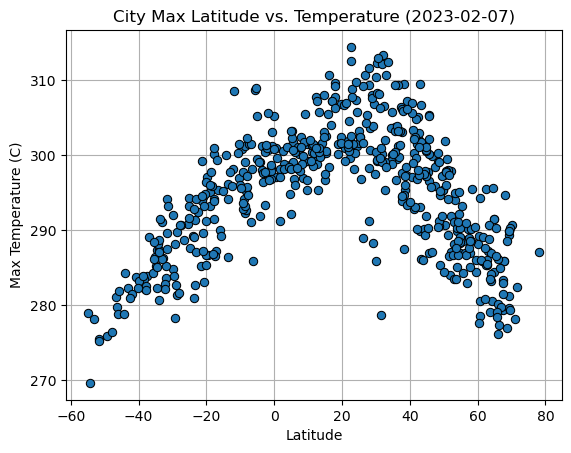

In [17]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("C:\\Users\Roses\\Documents\\Analysis Projects\\Module6\\python-api-challenge\\output_data\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

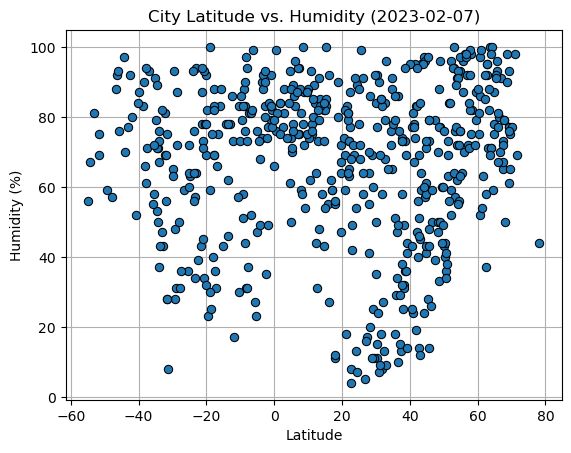

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("C:\\Users\Roses\\Documents\\Analysis Projects\\Module6\\python-api-challenge\\output_data\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

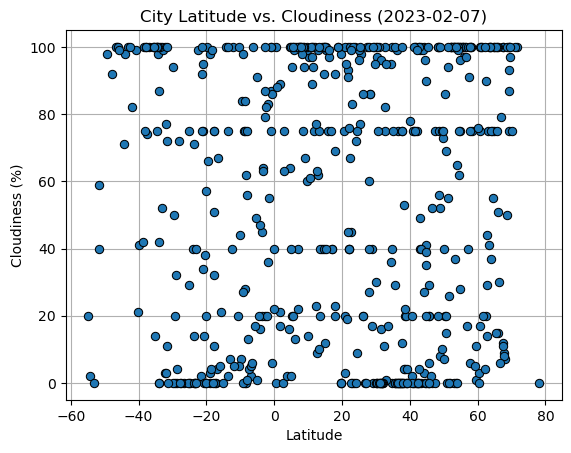

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("C:\\Users\Roses\\Documents\\Analysis Projects\\Module6\\python-api-challenge\\output_data\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

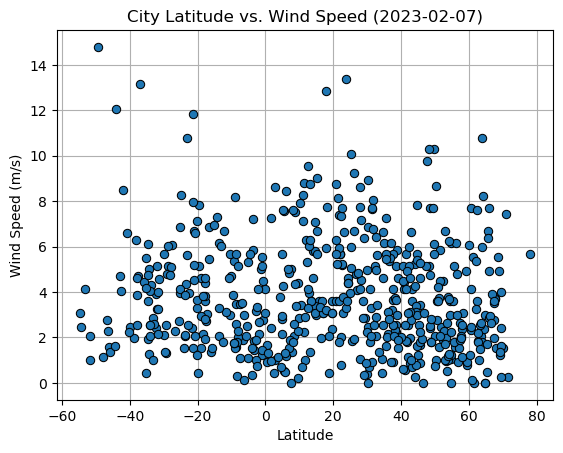

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-07)")
plt.grid()

# Save the figure
plt.savefig("C:\\Users\Roses\\Documents\\Analysis Projects\\Module6\\python-api-challenge\\output_data\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,284.43,87,75,3.00,RU,1689363783
4,albany,42.6001,-73.9662,302.01,69,100,0.89,US,1689363636
5,ribeira grande,38.5167,-28.7000,295.37,73,20,5.14,PT,1689363784
6,saint-francois,46.4154,3.9054,299.84,50,0,0.00,FR,1689363785
7,ilulissat,69.2167,-51.1000,281.16,93,75,1.54,GL,1689363785


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,269.61,67,2,2.44,GS,1689363783
1,ushuaia,-54.8000,-68.3000,278.96,56,20,3.09,AR,1689363783
3,puerto natales,-51.7236,-72.4875,275.40,75,40,2.06,CL,1689363784
9,broken hill,-31.9500,141.4333,283.65,56,77,5.16,AU,1689363785
10,inyonga,-6.7167,32.0667,291.12,52,2,1.91,TZ,1689363786


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4378118515010295


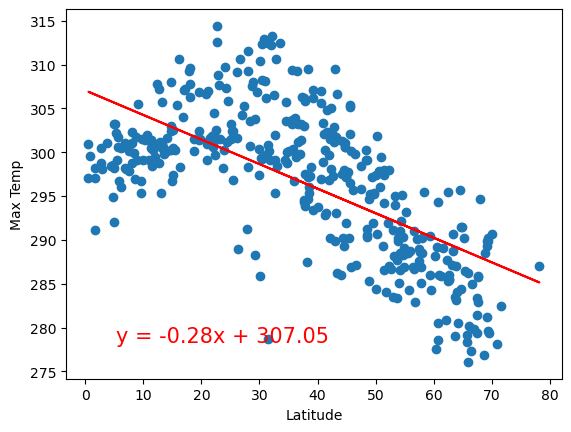

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.7124440643726707


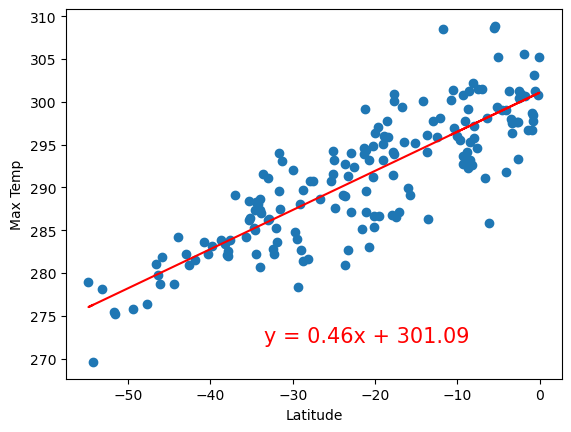

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship: There is no correlation between max temp and latitude in the northern hemisphere. However, there is a strong posititve correlation between max temp and latitude in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.003897951749656269


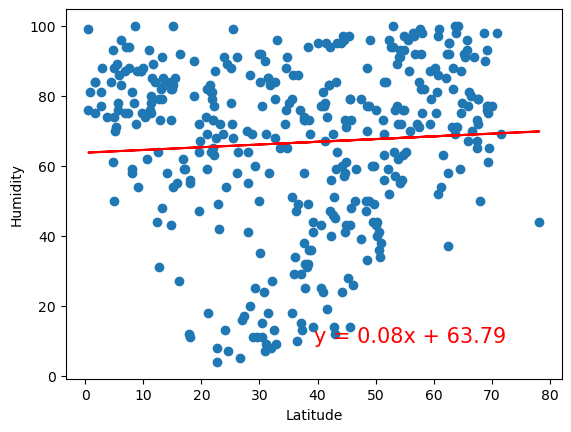

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.0003064073016785648


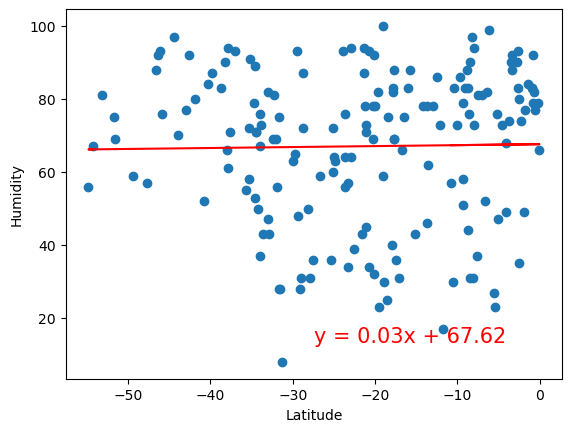

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

**Discussion about the linear relationship: There is no correlation between humidity and latitude in the northern or southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0007499094508418912


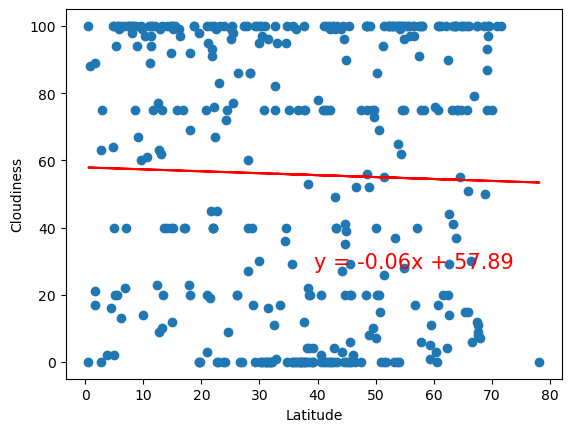

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.031488798059203925


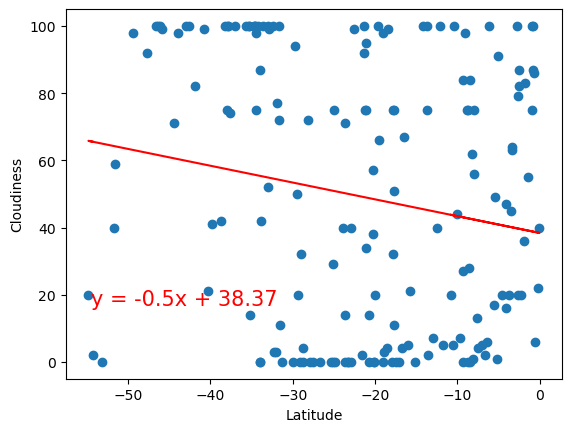

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.05, 0.2)

**Discussion about the linear relationship: There is no correlation between cloudiness and latitude in the northern or southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024665737454184086


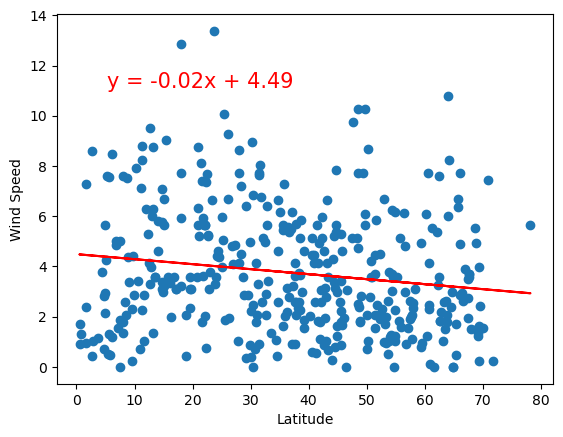

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 0.1,0.8)

The r-value is: 0.016049608630885896


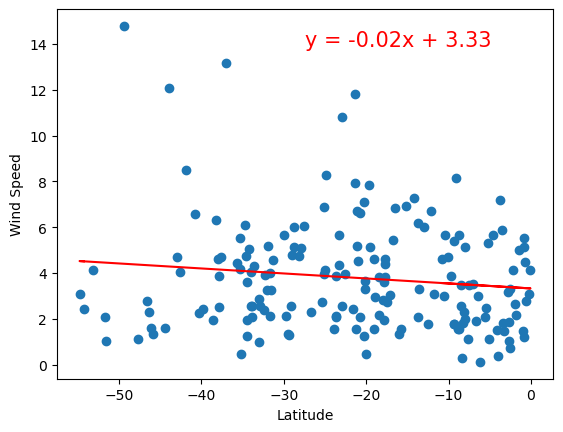

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 0.5, 0.9)

**Discussion about the linear relationship: There is no correlation between wind speed and latitude in the northern or southern hemisphere.